In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('EPL_new_dataset.csv')

In [3]:
df.drop(['Unnamed: 0','HomeTeam','AwayTeam','FTR'],axis=1,inplace=True)

In [4]:
output = df['Result']
df.drop('Result',axis=1,inplace=True)

In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))

In [7]:
sdf = scaler.fit_transform(df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df,output, test_size=0.40, random_state=42)

In [10]:
lr = LogisticRegression()

In [11]:
lr_param = {'penalty':['l1','l2'],'C':[10,1,0.1,0.01,0.001]}

In [12]:
gs = GridSearchCV(lr,lr_param)

In [35]:
#gs.fit(X_train,y_train)

In [89]:
#gs.cv_results_
params = gs.cv_results_['params']
mean_score = gs.cv_results_['mean_test_score']
lr_p = pd.DataFrame(params)
lr_p['Mean score'] = mean_score
gs.best_params_

{'C': 0.1, 'penalty': 'l1'}

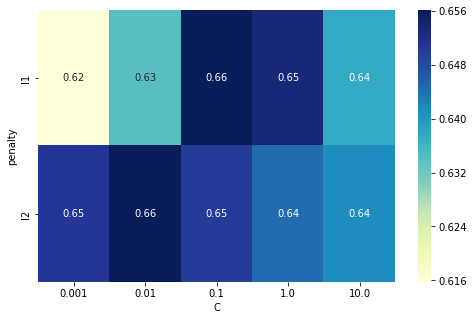

In [17]:
lr_hm = lr_p.pivot_table(values='Mean score',index='penalty',columns='C')
plt.figure(figsize=(8,5))
sns.heatmap(lr_hm,cmap='YlGnBu',annot=True)

In [18]:
from sklearn.svm import SVC
svm = SVC()

In [19]:
svm_param = {'kernel':('rbf','sigmoid'), 'C':[1, 10,100,1000],'gamma':[1,0.1,0.01,0.001]}

In [20]:
svm_gs = GridSearchCV(svm,svm_param)

In [21]:
svm_gs.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
sv_p = svm_gs.cv_results_['params']
sv_r = svm_gs.cv_results_['mean_test_score']
sv_cr = pd.DataFrame(sv_p)
sv_cr['Mean score'] = sv_r
sv_hm = sv_cr.pivot_table(values='Mean score',index=['C','kernel'],columns='gamma')

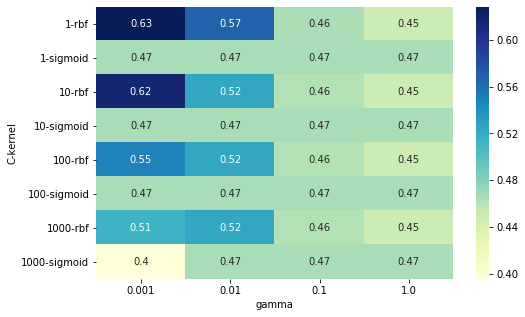

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(sv_hm,cmap='YlGnBu',annot=True)

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(min_samples_leaf=4,min_samples_split=6)
rf_param = {'n_estimators':[400,500,600,700,900],
            'max_depth':[30,40,50,60,70]}

In [51]:
#rf_gs = GridSearchCV(rf,rf_param)

In [52]:
#rf_gs.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=4,
                                              min_samples_split=6,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [87]:
rf_p = rf_gs.cv_results_['params']
rf_r = rf_gs.cv_results_['mean_test_score']
rf_cr = pd.DataFrame(rf_p)
rf_cr['Mean score'] = rf_r
rf_gs.best_params_

{'max_depth': 60, 'n_estimators': 700}

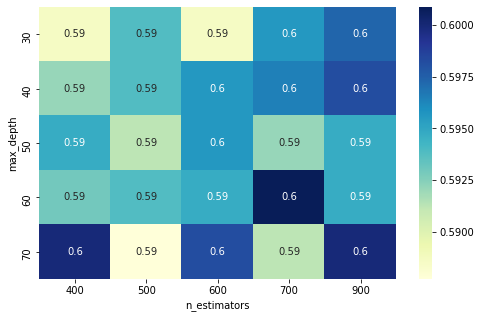

In [60]:
rf_hm = rf_cr.pivot_table(values='Mean score',index='max_depth',columns='n_estimators')
plt.figure(figsize=(8,5))
sns.heatmap(rf_hm,cmap='YlGnBu',annot=True)

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dt = DecisionTreeClassifier()
dr_param = {'min_samples_split':[2,20,40,60,100,150,200,250],
            'min_samples_leaf':[1,2,4,6,8],
           'criterion':['gini','entropy']}

In [63]:
dt_gs = GridSearchCV(dt,dr_param)

In [64]:
dt_gs.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
          

In [88]:
dt_p = dt_gs.cv_results_['params']
dt_r = dt_gs.cv_results_['mean_test_score']
dt_cr = pd.DataFrame(dt_p)
dt_cr['Mean score'] = dt_r
dt_gs.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 150}

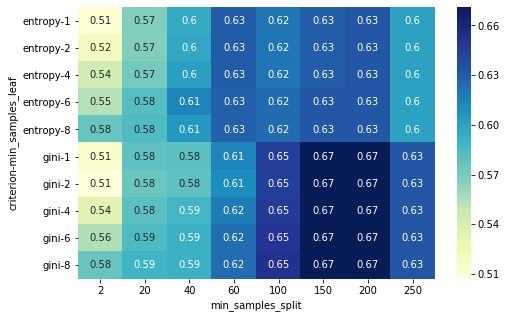

In [70]:
dt_hm = dt_cr.pivot_table(values='Mean score',index=['criterion','min_samples_leaf'],columns='min_samples_split')
plt.figure(figsize=(8,5))
sns.heatmap(dt_hm,cmap='YlGnBu',annot=True)

In [71]:
from sklearn.ensemble import AdaBoostClassifier

In [95]:
adb = AdaBoostClassifier()
ad_param = {'n_estimators':[50,80,100,150,200,250],
           'learning_rate':[0.2,0.4,0.6,1.0,2.0]}

In [96]:
ad_gs = GridSearchCV(adb,ad_param)

In [97]:
ad_gs.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 1.0, 2.0],
                         'n_estimators': [50, 80, 100, 150, 200, 250]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [98]:
ad_p = ad_gs.cv_results_['params']
ad_r = ad_gs.cv_results_['mean_test_score']
ad_cr = pd.DataFrame(ad_p)
ad_cr['Mean score'] = ad_r
ad_cr.head()

,learning_rate,n_estimators,Mean score
0,0.2,50,0.662281
1,0.2,80,0.653509
2,0.2,100,0.654386
3,0.2,150,0.639474
4,0.2,200,0.636842


In [99]:
ad_gs.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

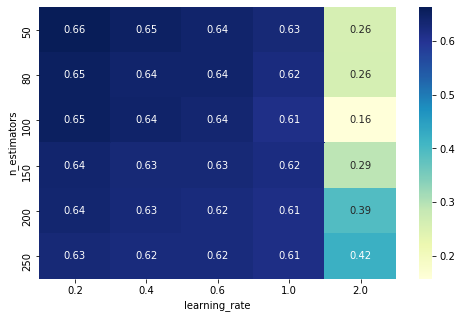

In [100]:
ad_hm = ad_cr.pivot_table(values='Mean score',index='n_estimators',columns='learning_rate')
plt.figure(figsize=(8,5))
sns.heatmap(ad_hm,cmap='YlGnBu',annot=True)

In [101]:
from sklearn.naive_bayes import GaussianNB

In [110]:
nb = GaussianNB()
nb_param = {'priors':[None],'var_smoothing':[1e-06,1e-07,1e-08,1e-09,1e-10,1e-11]}

In [111]:
nb_gs = GridSearchCV(nb,nb_param)

In [112]:
nb_gs.fit(X_train,y_train)

C:\Users\Nasar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GaussianNB(priors=None, var_smoothing=1e-09), iid='warn',
             n_jobs=None,
             param_grid={'priors': [None],
                         'var_smoothing': [1e-06, 1e-07, 1e-08, 1e-09, 1e-10,
                                           1e-11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [113]:
nb_p = nb_gs.cv_results_['params']
nb_r = nb_gs.cv_results_['mean_test_score']
nb_cr = pd.DataFrame(nb_p)
nb_cr['Mean score'] = nb_r
nb_cr.head()

,priors,var_smoothing,Mean score
0,None,1.000000e-06,0.588596
1,None,1.000000e-07,0.588596
2,None,1.000000e-08,0.588596
3,None,1.000000e-09,0.588596
4,None,1.000000e-10,0.588596


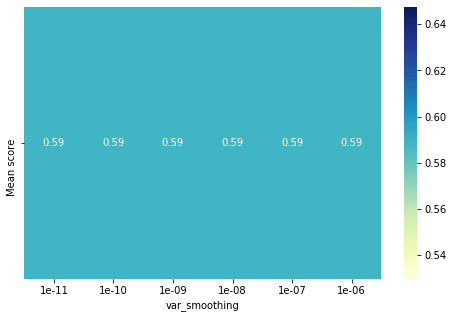

In [117]:
nb_hm = nb_cr.pivot_table(values='Mean score',columns='var_smoothing')
plt.figure(figsize=(8,5))
sns.heatmap(nb_hm,cmap='YlGnBu',annot=True)